# Analysis for ORLR workshop, NeurIPS 2020

In [1]:
import os
import sys
import urllib, io
os.getcwd()
sys.path.append("..")
sys.path.append("../utils")
sys.path.append("../analysis/utils")


import numpy as np
import scipy.stats as stats
import pandas as pd

import pymongo as pm
from collections import Counter
import json
import re
import ast

from PIL import Image, ImageOps, ImageDraw, ImageFont 

from io import BytesIO
import base64

import  matplotlib
from matplotlib import pylab, mlab, pyplot
%matplotlib inline
from IPython.core.pylabtools import figsize, getfigs
plt = pyplot
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

import seaborn as sns
sns.set_context('talk')
sns.set_style('darkgrid')

from IPython.display import clear_output

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import drawing_utils as drawing
import importlib
import scoring

### Load dataframes

In [2]:
#read in dataframes from each eventType
df_block = pd.read_csv('df_block.csv')
df_chat = pd.read_csv('df_chat.csv')
df_exit = pd.read_csv('df_exit.csv')
df_trial = pd.read_csv('df_trial.csv')

### Apply exclusion criteria

In [3]:
# How many dyads fulfill 75% Accuracy on 75% of trials
df75 = pd.DataFrame(df_trial.groupby(['gameid', 'trialNum'])['trialScore'].sum()>75).groupby(['gameid']).sum()
df75['trials'] = df75['trialScore']

#delete rows that aren't greater than 75% in 9 trials
df75 = df75[df75['trials']>=9]

print("Total dyads achieving 75% Accuracy on 75% of trials:",len(df75))

Total dyads achieving 75% Accuracy on 75% of trials: 49


In [4]:
includedGames = list(df75.reset_index().gameid)

In [ ]:
# Exclude from analysis
df_block = df_block[df_block.gameid.isin(includedGames)]
df_chat = df_chat[df_chat.gameid.isin(includedGames)]
df_exit = df_exit[df_exit.gameid.isin(includedGames)]
df_trial = df_trial[df_trial.gameid.isin(includedGames)]

## Task performance

### Accuracy

### Timing

## NLP

### Efficiency of instructions

In [ ]:
trial_sums = df_chat.groupby(['gameid','trialNum']).sum().reset_index()
rep_sums = df_chat[~df_chat.practice].groupby(['gameid','repNum']).sum().reset_index()

trial_counts = df_chat.groupby(['gameid','trialNum']).count().reset_index()

#### Across trials

Text(0.5, 1.0, 'total words across trials')

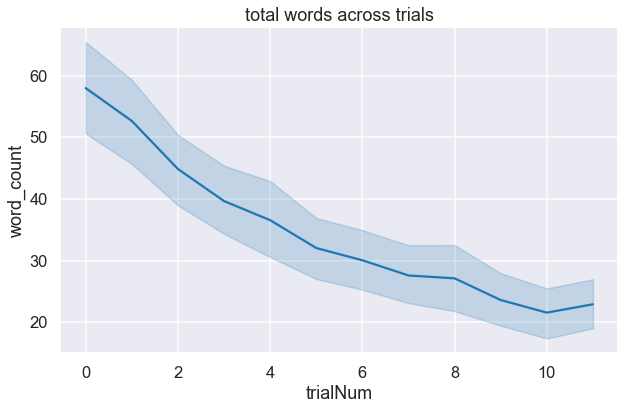

In [13]:
# word count across trials

plt.figure(figsize=(10,6))
sns.lineplot(data=trial_sums[~trial_sums.practice], x='trialNum', y='word_count')
#              , hue='gameid')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.title('total words across trials')

Text(0.5, 1.0, 'total characters across trials')

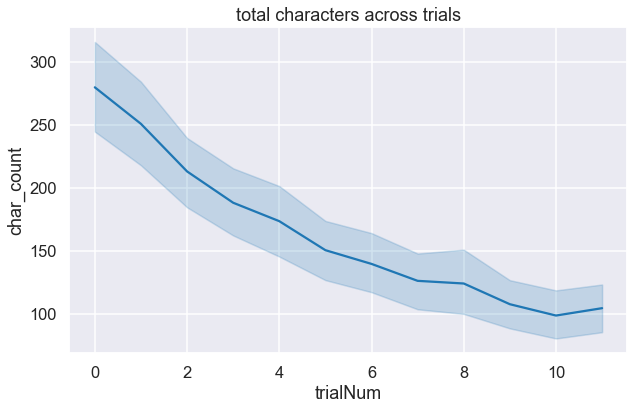

In [12]:
# char count across trials

plt.figure(figsize=(10,6))
sns.lineplot(data=trial_sums, x='trialNum', y='char_count')
             #, hue='gameid')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.title('total characters across trials')

#### Across repetitions of scenes (sides of towers can switch)

/Users/will/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


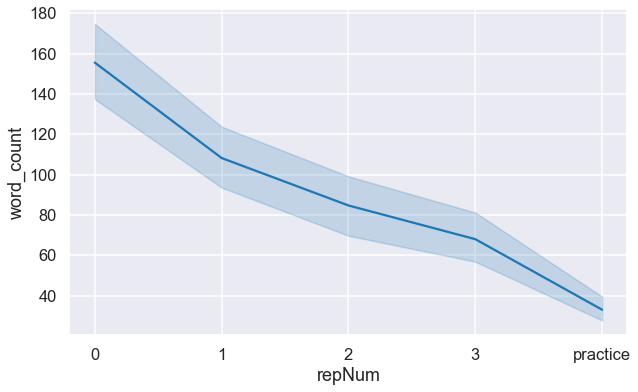

In [16]:
# word count across reps

plt.figure(figsize=(10,6))
sns.lineplot(data=rep_sums[~(rep_sums.practice=='practice')], x='repNum',y='word_count')

### Conventions

### Compositional abstractions

#### Frequency of words over time

#### Emergence of new tokens